In [1]:
# Theses are different ways to display figures, depending on the
# environment, some may work better or some not at all:
%matplotlib inline
# %matplotlib widget
#      widget (installed by ``pip install ipympl``) gives better interactive inline plots
# %matplotlib notebook
# %matplotlib ipympl
# %matplotlib nbagg
# Fix failing variable completion (for older installations):
# %config Completer.use_jedi = False

# First, Simplest Usecase

Let's optimize a simple ellipsoid function, $\sum_{i=1}^n 1000^{\frac{i-1}{n-1}}x_i^2$, whose Hessian has a condition number of $10^6$:

In [2]:
# pip install cma  # outcomment in case the cma module is not installed
import cma

fun = cma.ff.elli  # we could use `functools.partial(cma.ff.elli, cond=1e4)` to change the condition number to 1e4
x0 = 4 * [2]  # initial solution
sigma0 = 1    # initial standard deviation to sample new solutions

In [3]:
x, es = cma.fmin2(fun, x0, sigma0)

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 4 (seed=636470, Mon Aug 18 17:11:45 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 3.425087757844685e+05 1.0e+00 9.51e-01  9e-01  1e+00 0:00.0
    2     16 3.323835278552872e+04 1.2e+00 1.01e+00  9e-01  1e+00 0:00.0
    3     24 9.606545856338897e+03 1.3e+00 9.68e-01  9e-01  1e+00 0:00.0
  100    800 1.362216720685818e-03 1.0e+03 2.23e-02  4e-05  4e-02 0:00.0
  195   1560 1.569254925383874e-15 1.1e+03 1.02e-06  3e-11  3e-08 0:00.1
termination on tolfun=1e-11 (Mon Aug 18 17:11:45 2025)
final/bestever f-value = 1.035408e-15 1.035408e-15 after 1561/1561 evaluations
incumbent solution: [ 1.91047600e-08, 2.45249857e-09, -7.23818258e-11, -4.06817379e-12]
std deviation: [3.04939878e-08, 2.83280100e-09, 3.04076079e-10, 2.98428199e-11]


The return values are
- `x`, the best evaluated solution and
- `es`, the `cma.CMAEvolutionStrategy` class instance used to run the optimization.

The latter contains all available information about the run and the more complete return value under `es.result`.

In [4]:
es.result._asdict()  # pretty print the named tuple as dictionary

{'xbest': array([ 1.91047600e-08,  2.45249857e-09, -7.23818258e-11, -4.06817379e-12]),
 'fbest': 1.035408102323416e-15,
 'evals_best': 1561,
 'evaluations': 1561,
 'iterations': 195,
 'xfavorite': array([ 1.91047600e-08,  2.45249857e-09, -7.23818258e-11, -4.06817379e-12]),
 'stds': array([3.04939878e-08, 2.83280100e-09, 3.04076079e-10, 2.98428199e-11]),
 'stop': {'tolfun': 1e-11}}

In [5]:
es.result_pretty()  # pretty print some information and returns es.result

termination on tolfun=1e-11
final/bestever f-value = 1.035408e-15 1.035408e-15 after 1561/1561 evaluations
incumbent solution: [ 1.91047600e-08, 2.45249857e-09, -7.23818258e-11, -4.06817379e-12]
std deviation: [3.04939878e-08, 2.83280100e-09, 3.04076079e-10, 2.98428199e-11]


CMAEvolutionStrategyResult(xbest=array([ 1.91047600e-08,  2.45249857e-09, -7.23818258e-11, -4.06817379e-12]), fbest=1.035408102323416e-15, evals_best=1561, evaluations=1561, iterations=195, xfavorite=array([ 1.91047600e-08,  2.45249857e-09, -7.23818258e-11, -4.06817379e-12]), stds=array([3.04939878e-08, 2.83280100e-09, 3.04076079e-10, 2.98428199e-11]), stop={'tolfun': 1e-11})

# Options
CMA-ES options can be passed as fourth parameter to `cma.fmin2`. Valid options are

In [6]:
print(cma.__version__)
cma.CMAOptions()

4.3.0


{'AdaptSigma': 'True  # or False or any CMAAdaptSigmaBase class e.g. CMAAdaptSigmaTPA, CMAAdaptSigmaCSA',
 'CMA_active': 'True  # negative update, conducted after the original update',
 'CMA_active_injected': '0  #v weight multiplier for negative weights of injected solutions',
 'CMA_cmean': '1  # learning rate for the mean value',
 'CMA_const_trace': 'False  # normalize trace, 1, True, "arithm", "geom", "aeig", "geig" are valid',
 'CMA_diagonal': '0*100*N/popsize**0.5  # nb of iterations with diagonal covariance matrix, True for always',
 'CMA_diagonal_decoding': '0  # learning rate multiplier for additional diagonal update',
 'CMA_eigenmethod': 'np.linalg.eigh  # or cma.utilities.math.eig or pygsl.eigen.eigenvectors',
 'CMA_elitist': 'False  #v or "initial" or True, elitism likely impairs global search performance',
 'CMA_injections_threshold_keep_len': '1  #v keep length if Mahalanobis length is below the given relative threshold',
 'CMA_mirrors': 'popsize < 6  # values <0.5 are int

A `#v` indicates versatile options that can be changed at any time during the run by changing the `opts` attribute of the underlying [`CMAEvolutionStrategy`](https://cma-es.github.io/apidocs-pycma/cma.evolution_strategy.CMAEvolutionStrategy.html) class instance.

To run the code entirely quietly, for example for benchmarking or in repetitive production runs when the desired behavior is established, use `{'verbose': -9}`.

An often useful option to limit the output lines in long runs is `'verb_disp_overwrite'` setting the iteration number after which the console output lines are overwritten:

In [7]:
x, es = cma.fmin2(cma.ff.cigtab, 33 * [1], 1, options={'verb_disp_overwrite': 300})

(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 33 (seed=662964, Mon Aug 18 17:11:45 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     14 7.234692198957698e+01 1.0e+00 9.42e-01  9e-01  9e-01 0:00.0
    2     28 1.158930495770792e+02 1.1e+00 9.14e-01  9e-01  9e-01 0:00.0
    3     42 4.183306047462758e+02 1.1e+00 8.88e-01  9e-01  9e-01 0:00.0
  100   1400 1.523073320924882e+02 2.8e+00 4.13e-01  2e-01  5e-01 0:00.1
  200   2800 4.489041678860814e+01 7.6e+00 2.37e-01  6e-02  3e-01 0:00.2
  300   4200 7.863125400811049e+00 1.5e+01 1.95e-01  3e-02  2e-01 0:00.2
 1193  16702 2.838425284484655e-14 6.9e+03 5.26e-08  3e-10  2e-06 0:00.9
termination on tolfun=1e-11 (Mon Aug 18 17:11:48 2025)
final/bestever f-value = 1.510157e-14 1.510157e-14 after 16703/16703 evaluations
incumbent solution: [-1.50467628e-06 -1.87923313e-10  5.20467292e-08 -2.81751257e-08
  4.59285461e-09 -2.98194128e-09 -2.09281910e-08 -1.64590037e-08 ...]
std deviations: [2.13233437e-06 3.

### Integer Variables
Integer variable indices can be indicated with the `integer_variables` option. Integer variables values are rounded (since version `4.2.1`). Technically, this option also induces for these variables
1. the setting a minimum standard deviation (like with option `'minstd'`) and
2. integer centering (Marty et al 2024).

(6_w,12)-aCMA-ES (mu_w=3.7,w_1=40%) in dimension 4 (seed=656672, Mon Aug 18 17:11:48 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     12 1.147667493650904e+08 1.0e+00 1.93e+00  2e+00  2e+00 0:00.0
    2     24 7.694118913886787e+07 1.3e+00 2.29e+00  2e+00  2e+00 0:00.0
    3     36 3.712369825598493e+07 1.3e+00 3.32e+00  3e+00  4e+00 0:00.0
   96   1152 6.808984058094384e-07 4.3e+03 2.18e-02  2e-06  2e-01 0:00.1
termination on ftarget=1e-06 (Mon Aug 18 17:11:48 2025)
final/bestever f-value = 2.503044e-07 2.503044e-07 after 1153/1153 evaluations
incumbent solution: [0.00000000e+00, 5.26164392e-06, 0.00000000e+00, 4.97529772e-07]
std deviation: [2.00000000e-01, 2.55425547e-04, 2.00000000e-01, 1.91606200e-06]


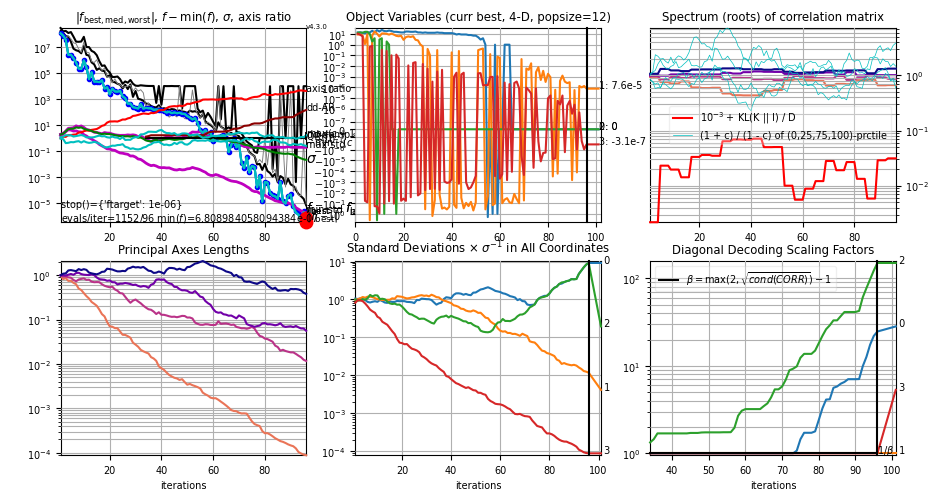

In [8]:
x, es = cma.fmin2(cma.ff.elli, 4 * [12], 2,
                  {'integer_variables':[0, 2], 'ftarget':1e-6})
es.plot(xsemilog=True);

In [9]:
print('f(best.x) = f({0})\n          = {1} = {2}'.format(es.best.x, es.best.f, cma.ff.elli(es.best.x)))
es.opts['minstd']

f(best.x) = f([0.00000000e+00 5.26164392e-06 0.00000000e+00 4.97529772e-07])
          = 2.503043634165574e-07 = 2.503043634165574e-07


array([0.2, 0. , 0.2, 0. ])

# Plotting
Let's plot some data from the optimization. The above call to `cma.fmin2` has (by default) written data to the default output folder `outcmaes`. These data will be overwritten each time the function is called again. To prevent this, we could set/change the output folder with the `verb_filenameprefix` option. An effective way to find out this kind of behavior is to query the [`CMAOptions`](https://cma-es.github.io/apidocs-pycma/cma.evolution_strategy.CMAOptions.html) with a search string and read the comments in the return "value".

In [10]:
cma.CMAOptions('file')

{'signals_filename': 'cma_signals.in  # read versatile options from this file (use `None` or `""` for no file) which contains a single options dict, e.g. ``{"timeout": 0}`` to stop, string-values are evaluated, e.g. "np.inf" is valid',
 'verb_append': '0  # initial evaluation counter, if append, do not overwrite output files',
 'verb_filenameprefix': 'outcmaes/  # output path (folder) and filenames prefix',
 'verb_log': '1  #v verbosity: write data to files every verb_log iteration, writing can be time critical on fast to evaluate functions'}

Plotting data of the latest executed run is as simple as

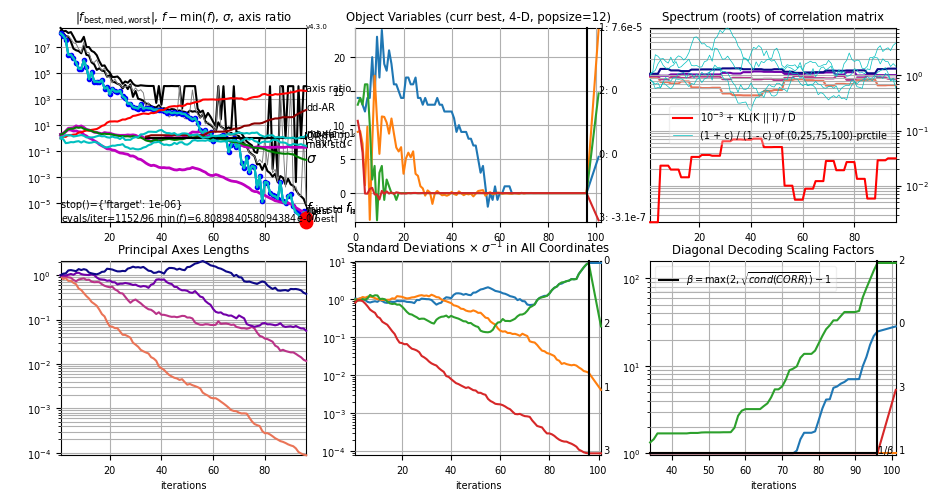

In [11]:
es.plot();  # cma.plot() does the same, as we just plot the data from the default output folder

A description of the output is given in the caption of Figure 3 in [Hansen et al (2015): Evolution Strategies](https://hal.inria.fr/hal-01155533/file/es-overview-2015.pdf#page=17).

# Domain Boundaries

We can add lower and upper domain boundaries on any variable. The easiest way is to use the function wrapper `BoundDomainTransform`. We bound the second variable from below to values $\ge1$:

In [ ]:
lower_bounds = [None, 1, None]
bfun = cma.BoundDomainTransform(fun, [lower_bounds, None])  # bfun evaluates fun only in the bounded domain

xopt_b, es = cma.fmin2(bfun, x0, sigma0)  # fmin2 may search in an unbounded domain

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 4 (seed=626866, Mon Aug 18 17:11:50 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 1.086595521556410e+06 1.0e+00 1.07e+00  9e-01  1e+00 0:00.0
    2     16 3.670787329327661e+05 1.4e+00 1.29e+00  1e+00  2e+00 0:00.0
    3     24 2.850010209622079e+05 1.9e+00 1.40e+00  1e+00  2e+00 0:00.0
  100    800 1.000000006368323e+02 9.0e+02 1.06e-03  1e-06  1e-03 0:00.1
  164   1312 9.999999999999999e+01 5.9e+02 1.50e-06  2e-10  9e-08 0:00.1
termination on tolfun=1e-11 (Mon Aug 18 17:11:50 2025)
final/bestever f-value = 1.000000e+02 1.000000e+02 after 1313/1295 evaluations
incumbent solution: [ 2.66165115e-08, 9.49999996e-01, 4.62666881e-10, -3.43620311e-11]
std deviation: [9.32342272e-08, 3.53721300e-09, 1.00960869e-09, 1.52404025e-10]


All solutions from `es.result` need to be transformed with `bfun.transform` to represent solutions of `fun`.

In [ ]:
x = es.result.xfavorite  # is not bounded
x, bfun.transform(x)

(array([ 2.66165115e-08,  9.49999996e-01,  4.62666881e-10, -3.43620311e-11]),
 array([ 2.66165115e-08,  1.00000000e+00,  4.62666881e-10, -3.43620311e-11]))

In [14]:
print("bfun(x) = bfun({0}) = {1} \n"
      "        =  fun({2}) = {3} \n"
      .format(x, bfun(x), bfun.transform(x), fun(bfun.transform(x))))

bfun(x) = bfun([ 2.66165115e-08  9.49999996e-01  4.62666881e-10 -3.43620311e-11]) = 99.99999999999997 
        =  fun([ 2.66165115e-08  1.00000000e+00  4.62666881e-10 -3.43620311e-11]) = 99.99999999999997 



It is _always_ advisable to have a (quick) look at the plotted results.

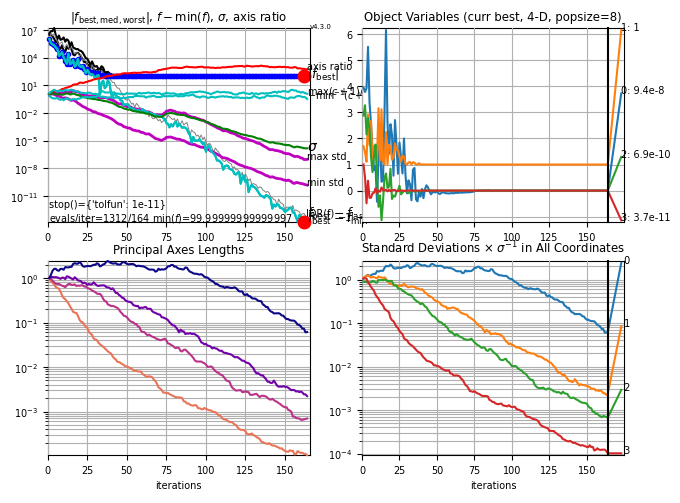

In [15]:
es.plot(xtransform=bfun.transform);  # show x-values (object variables) as evaluated on fun

Because we know the optimum, we can visually check the convergence behavior, revealing that _in the transformed space_ the second variable (orange with index 1) converges twice as fast as the others:

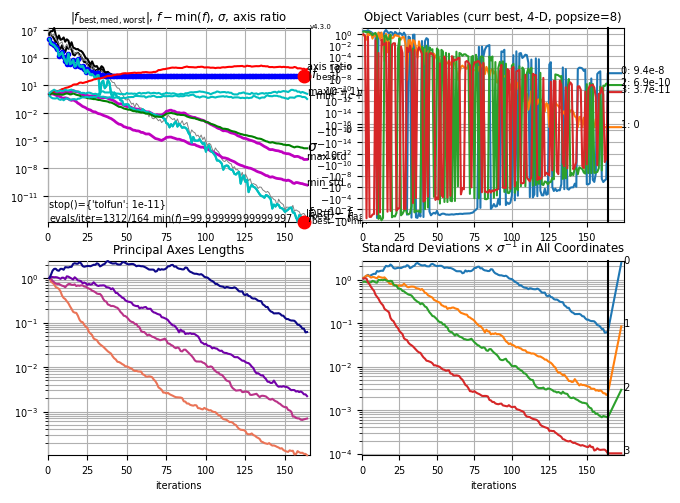

In [16]:
es.plot(xtransform=bfun.transform, xsemilog=True, x_opt=[0, 1] + (len(x0) - 2) * [0]
       );  # show evaluated x-values minus x_opt in symlog display

Alternatively to using `BoundDomainTransform`, the options provide a flexible choice of boundary handlers using the `'bounds'` and `'BoundaryHander'` options. We can find out about these option by calling

In [17]:
cma.CMAOptions('bound')  # returns options that contain "bound"

{'BoundaryHandler': 'BoundTransform  # or BoundPenalty, unused when ``bounds in (None, [None, None])``',
 'bounds': '[None, None]  # lower (=bounds[0]) and upper domain boundaries, each a scalar or a list/vector',
 'maxstd_boundrange': '1/3  # maximal std relative to bound_range per coordinate, overruled by maxstd'}

The default handler `BoundTransform` is based on the same code as `BoundDomainTransform`. In this case, the initial solution must be within the given bounds (it is, in our case). As above, `'bounds'` is a list of two values, `[lower_bounds, upper_bounds]`, where `lower_bounds` and `upper_bounds` can be a scalar that applies to all variables or a list. If the list is shorter than the initial solution, the last value is applied to the remaining dimensions.

Running the same example as above with the bounds option:

In [18]:
xopt_b, es_b = cma.fmin2(fun, x0, sigma0, {'bounds': [[None, 1, None], None]})

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 4 (seed=601224, Mon Aug 18 17:11:52 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 1.159715292081019e+06 1.0e+00 1.01e+00  1e+00  1e+00 0:00.0
    2     16 1.783630402729305e+05 1.4e+00 1.15e+00  1e+00  1e+00 0:00.0
    3     24 1.250946031912873e+05 1.5e+00 1.13e+00  1e+00  1e+00 0:00.0
  100    800 1.000561812003188e+02 1.0e+03 7.12e-02  1e-04  2e-01 0:00.1
  200   1600 9.999999999999997e+01 1.7e+03 2.80e-06  9e-11  1e-07 0:00.1
  205   1640 9.999999999999997e+01 1.2e+03 1.68e-06  5e-11  6e-08 0:00.1
termination on tolfun=1e-11 (Mon Aug 18 17:11:52 2025)
final/bestever f-value = 1.000000e+02 1.000000e+02 after 1641/1548 evaluations
incumbent solution: [2.96877210e-09, 1.00000000e+00, 1.91615491e-11, 2.46508985e-12]
std deviation: [5.91508279e-08, 1.77123650e-09, 4.19729468e-10, 5.05387278e-11]


In [19]:
# now solutions _are_ transformed, however the mean is not (hence ``plot_mean=True`` should use ``.boundary_handler.transform``)
es_b.result.xbest, es_b.mean, es_b.boundary_handler.transform(es_b.mean)

(array([3.56567896e-08, 1.00000000e+00, 2.27330649e-11, 1.56105781e-11]),
 array([2.96877210e-09, 9.50000002e-01, 1.91615491e-11, 2.46508985e-12]),
 array([2.96877210e-09, 1.00000000e+00, 1.91615491e-11, 2.46508985e-12]))

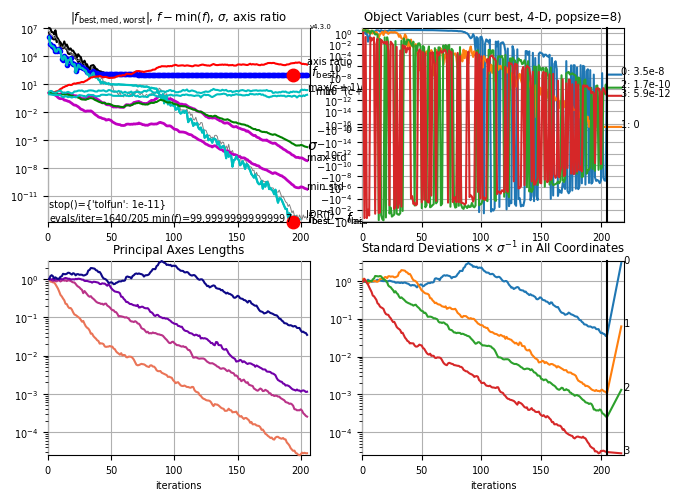

In [20]:
es_b.plot(xsemilog=True, x_opt=[0, 1] + (len(x0) - 2) * [0]);

# Rescaling of the Objective
In a practical application, the encoding of variables is often essential to turn a _very_ difficult problem into less difficult one, see also [here](https://cma-es.github.io/cmaes_sourcecode_page.html#practical). The simplest encoding is a rescaling.
This can be done with the [`cma.ScaleCoordinates`](https://cma-es.github.io/apidocs-pycma/cma.fitness_transformations.ScaleCoordinates.html) wrapping class.
An alternative, simpler and somewhat more transparent solution is a coordinate-wise scaling of the initial `sigma` with the option `'CMA_stds'`.
In contrast to [`cma.ScaleCoordinates`](https://cma-es.github.io/apidocs-pycma/cma.fitness_transformations.ScaleCoordinates.html), this is also directly compatible with integer variables.
The [`CMAOptions`](https://cma-es.github.io/apidocs-pycma/cma.evolution_strategy.CMAOptions.html) give again the hint where to look.

In [21]:
cma.CMAOptions('scale')

{'CMA_stds': 'None  # multipliers for sigma0 in each coordinate (not represented in C), or use `cma.ScaleCoordinates` instead',
 'scaling_of_variables': 'None  # deprecated, rather use fitness_transformations.ScaleCoordinates instead (or CMA_stds). WAS: Scale for each variable in that effective_sigma0 = sigma0*scaling. Internally the variables are divided by scaling_of_variables and sigma is unchanged, default is `np.ones(N)`'}

We rescale the ellipsoid function to its most benign form. In dimension 4, this saves (only) about 25% of the necessary evaluations.

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 4 (seed=593277, Mon Aug 18 17:11:53 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 2.369553549390113e+06 1.0e+00 9.06e-01  9e-01  9e+02 0:00.0
    2     16 2.168960574048349e+06 1.2e+00 8.66e-01  7e-01  8e+02 0:00.0
    3     24 1.066186098030202e+06 1.6e+00 8.51e-01  7e-01  7e+02 0:00.0
   94    752 9.734191152256839e-07 1.6e+00 7.85e-05  2e-06  2e-03 0:00.0
termination on ftarget=1e-06 (Mon Aug 18 17:11:53 2025)
final/bestever f-value = 1.387655e-06 9.734191e-07 after 753/750 evaluations
incumbent solution: [-1.34415811e-04, -7.00474944e-06, -4.97777305e-06, -1.05683439e-06]
std deviation: [1.58009927e-03, 1.97929194e-04, 1.76144054e-05, 1.50486437e-06]


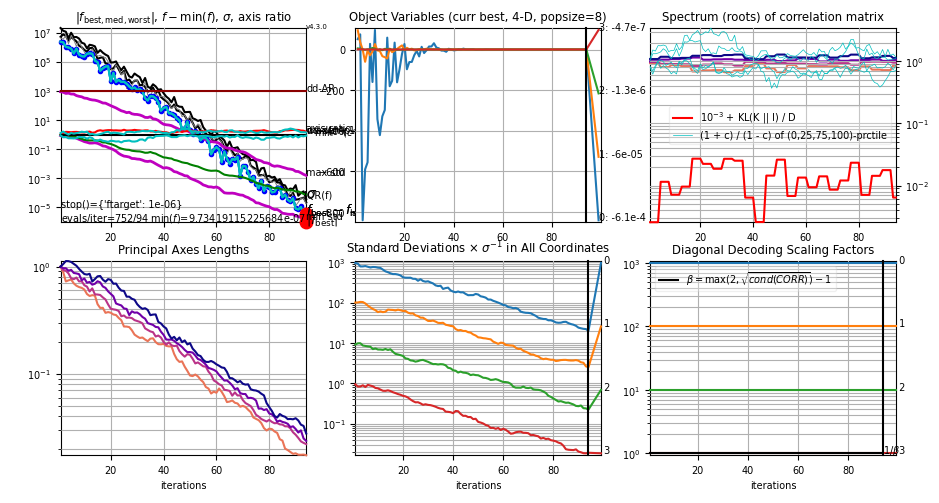

In [22]:
vec_sigma0 = [1e3 / 1e3**(i / 3) for i in range(4)]
xopt2, es2 = cma.fmin2(fun, x0, sigma0, {'CMA_stds': vec_sigma0, 'ftarget':1e-6})
cma.plot();

On the 40-dimension ellipsoid function, the saving is a factor of close to seven:

In [23]:
xopt40, es40 = cma.fmin2(fun, 40 * [2], sigma0, {'ftarget': 1e-6, 'verbose':-9})
vec_sigma0 = [1e3 / 1e3**(i / 39) for i in range(40)]
xopt0, es0 = cma.fmin2(fun, 40 * [2], sigma0, {'CMA_stds': vec_sigma0, 'ftarget': 1e-6, 'verbose':-9})

In [24]:
es40.result.fbest, es0.result.fbest, es40.result.evals_best / es0.result.evals_best

(7.170719788039047e-07, 5.240027778182674e-07, 6.79830118053556)

Without covariance matrix adaptation, the saving from rescaling is here _much_ more substantial, namely a factor of about $10\,000$, which can be inferred from Figure 10 in [Hansen and Ostermeier (2001)](http://www.cmap.polytechnique.fr/~nikolaus.hansen/publications.html#hansenaost2001).

# Advanced Options Settings
## Setting the step-size adaptation
Apart from the default cumulative step-size adaptation, another competitive way to adapt the step-size is the two-point step-size adaptation, TPA, see Equations (6)-(8) in [Akimoto and Hansen (2016)](https://hal.inria.fr/hal-01306551).

In [25]:
cma.CMAOptions('sigma')

{'AdaptSigma': 'True  # or False or any CMAAdaptSigmaBase class e.g. CMAAdaptSigmaTPA, CMAAdaptSigmaCSA',
 'CMA_dampsvec_fac': 'np.inf  # tentative and subject to changes, 0.5 would be a "default" damping for sigma vector update',
 'CMA_dampsvec_fade': '0.1  # tentative fading out parameter for sigma vector update',
 'CMA_stds': 'None  # multipliers for sigma0 in each coordinate (not represented in C), or use `cma.ScaleCoordinates` instead',
 'CSA_squared': 'False  #v use squared length for sigma-adaptation ',
 'scaling_of_variables': 'None  # deprecated, rather use fitness_transformations.ScaleCoordinates instead (or CMA_stds). WAS: Scale for each variable in that effective_sigma0 = sigma0*scaling. Internally the variables are divided by scaling_of_variables and sigma is unchanged, default is `np.ones(N)`',
 'stall_sigma_change_on_divergence_iterations': 'False  #v number of iterations of median worsenings threshold at which the sigma change is stalled; the default may become 2',
 'to

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 4 (seed=705191, Mon Aug 18 17:11:56 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 2.385642984621687e+06 1.0e+00 9.68e-01  9e-01  1e+00 0:00.0
    2     16 1.926371960763411e+05 1.3e+00 1.00e+00  9e-01  1e+00 0:00.0
    3     24 5.820590125738914e+04 1.4e+00 1.09e+00  9e-01  1e+00 0:00.0
  100    800 3.201659207099195e-04 1.4e+03 6.57e-03  8e-06  1e-02 0:00.1
  189   1512 6.103405873416378e-16 7.2e+02 5.85e-07  2e-11  2e-08 0:00.1
termination on tolfun=1e-11 (Mon Aug 18 17:11:57 2025)
final/bestever f-value = 6.756435e-16 6.103406e-16 after 1513/1510 evaluations
incumbent solution: [ 1.21924842e-08, -2.05066447e-09, 3.23427960e-11, -9.79815323e-12]
std deviation: [1.50852158e-08, 1.90270823e-09, 2.03266173e-10, 2.13941620e-11]


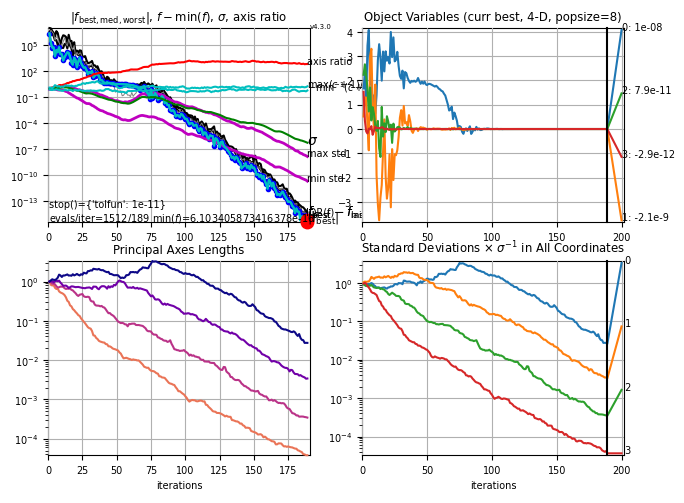

In [26]:
xopt, es = cma.fmin2(fun, x0, sigma0,
                     {'AdaptSigma': cma.sigma_adaptation.CMAAdaptSigmaTPA})
es.plot();

Without step-size adaptation, the "final" convergence stage of the optimization takes about 3 to 4 times longer (this effect becomes more pronounced in higher dimension):

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 4 (seed=686985, Mon Aug 18 17:11:57 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 5.508516916395851e+05 1.0e+00 1.00e+00  9e-01  1e+00 0:00.0
    2     16 4.848516383661415e+04 1.2e+00 1.00e+00  9e-01  1e+00 0:00.0
    3     24 1.720883277908815e+03 1.6e+00 1.00e+00  9e-01  1e+00 0:00.0
  100    800 4.686246156418742e-01 9.4e+02 1.00e+00  5e-04  5e-01 0:00.0
  200   1600 4.870464078461286e-05 1.2e+03 1.00e+00  6e-06  7e-03 0:00.1
  300   2400 1.245358145965217e-08 8.5e+02 1.00e+00  7e-08  4e-05 0:00.1
  397   3176 5.028435020755547e-13 9.7e+02 1.00e+00  7e-10  6e-07 0:00.1
termination on tolfun=1e-11 (Mon Aug 18 17:11:58 2025)
final/bestever f-value = 2.475258e-14 2.475258e-14 after 3177/3177 evaluations
incumbent solution: [-9.91159864e-09, 2.56023676e-09, -1.53239747e-09, -2.27253957e-11]
std deviation: [5.98106176e-07, 7.73620918e-08, 7.05532904e-09, 6.67553375e-10]


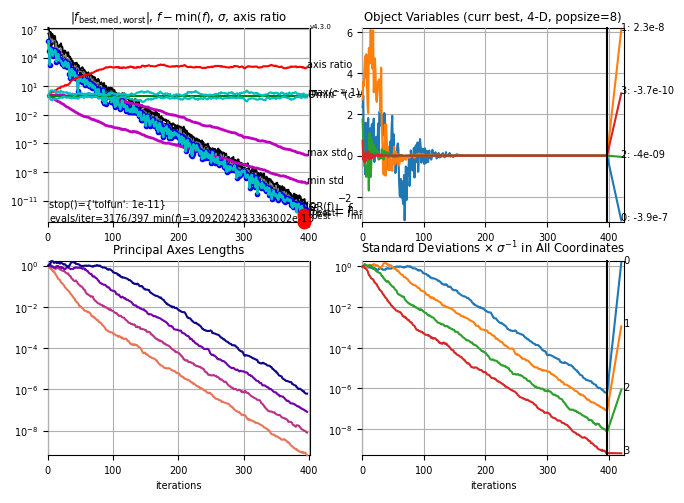

In [27]:
xopt, es = cma.fmin2(fun, x0, sigma0, {'AdaptSigma': False})
es.plot();

## Setting different learning rates (not basics)
A more research related option is the manual setting of learning rates. We can find the relevant options for the covariance matrix update like

In [28]:
cma.CMAOptions('covar')

{'CMA_diagonal': '0*100*N/popsize**0.5  # nb of iterations with diagonal covariance matrix, True for always',
 'CMA_on': '1  # multiplier for all covariance matrix updates',
 'CMA_rankmu': '1.0  # multiplier for rank-mu update learning rate of covariance matrix',
 'CMA_rankone': '1.0  # multiplier for rank-one update learning rate of covariance matrix',
 'tolconditioncov': '1e14  #v stop if the condition of the covariance matrix is above `tolconditioncov`'}

If we want to run CMA-ES only with rank-$\mu$ update, we set the learning rate for the rank-one update to zero. Then, to get a solution of the same quality on the 4-dimensional ellipsoid function, it takes on average about 15% more iterations.

In [29]:
xopt, es = cma.fmin2(fun, x0, sigma0, {'CMA_rankone': 0})

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 4 (seed=679769, Mon Aug 18 17:11:58 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 7.881287670878218e+04 1.0e+00 1.17e+00  1e+00  1e+00 0:00.0
    2     16 6.692504096518405e+04 1.2e+00 1.16e+00  1e+00  1e+00 0:00.0
    3     24 7.743551216488563e+04 1.3e+00 1.16e+00  1e+00  1e+00 0:00.0
  100    800 5.317612413171985e+00 1.7e+02 4.92e-02  5e-04  7e-02 0:00.0
  200   1600 3.678872136820113e-07 1.0e+03 4.11e-04  4e-07  4e-04 0:00.1
  265   2120 3.684194344825077e-14 1.1e+03 3.79e-07  8e-11  1e-07 0:00.1
termination on tolfun=1e-11 (Mon Aug 18 17:11:58 2025)
final/bestever f-value = 2.683063e-14 1.625713e-14 after 2121/2101 evaluations
incumbent solution: [ 1.46190182e-07, 5.20819310e-09, -1.35749976e-10, 5.06186626e-11]
std deviation: [1.06627142e-07, 1.24013260e-08, 9.06338735e-10, 8.09387054e-11]


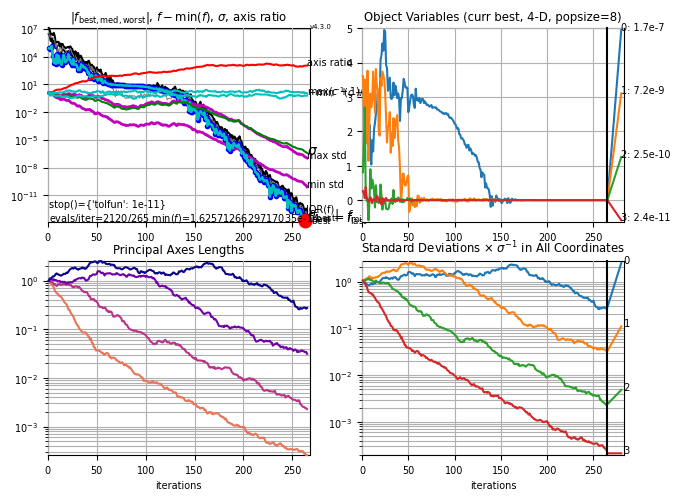

In [30]:
es.plot();

# See Also

This and other [`notebooks and recipes`](https://github.com/CMA-ES/pycma/tree/development/notebooks) can be found at https://github.com/CMA-ES/pycma/tree/development/notebooks

More `notebook / recipes` to come...